## Import

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from module import *
from loss import *
from optimizer import *
from utils import *
from trainer import Trainer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pickle

np.random.seed(1)

## Linéaire

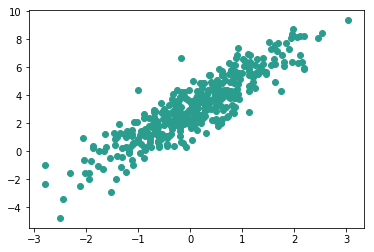

In [2]:
X = np.random.randn(400, 1)
Y = 2 * X + 3 + 1.01 * np.random.randn(400, 1)

plt.scatter(X[:, 0], Y[:, 0], c="#2a9d8f")

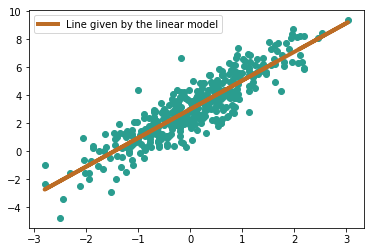

In [3]:
m = Linear(1, 1)
loss = MSELoss()
epochs = 1000
lr = 0.1

for epoch in range(epochs):
    yhat = m.forward(X)
    delta = loss.backward(Y, yhat) / 400
    m.backward_update_gradient(delta)
    m.update_parameters(gradient_step=lr)
    m.zero_grad()

plt.scatter(X[:, 0], Y[:, 0], c="#2a9d8f")
plt.plot(X, m.forward(X), c="#bc6c25", linewidth=4, label="Line given by the linear model")
plt.legend()


## Sequential

In [4]:
X, Y = load_planar_dataset()
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


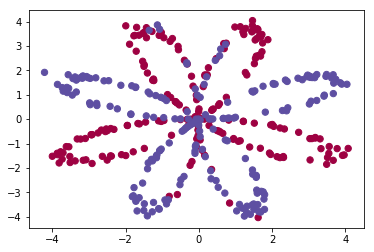

In [5]:
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral)

In [6]:
X, Y = X.T, Y.T

Accuracy for 1 hidden units: 0.655
Accuracy for 2 hidden units: 0.6525
Accuracy for 3 hidden units: 0.8925
Accuracy for 4 hidden units: 0.8975
Accuracy for 5 hidden units: 0.895
Accuracy for 20 hidden units: 0.8975
Accuracy for 50 hidden units: 0.895


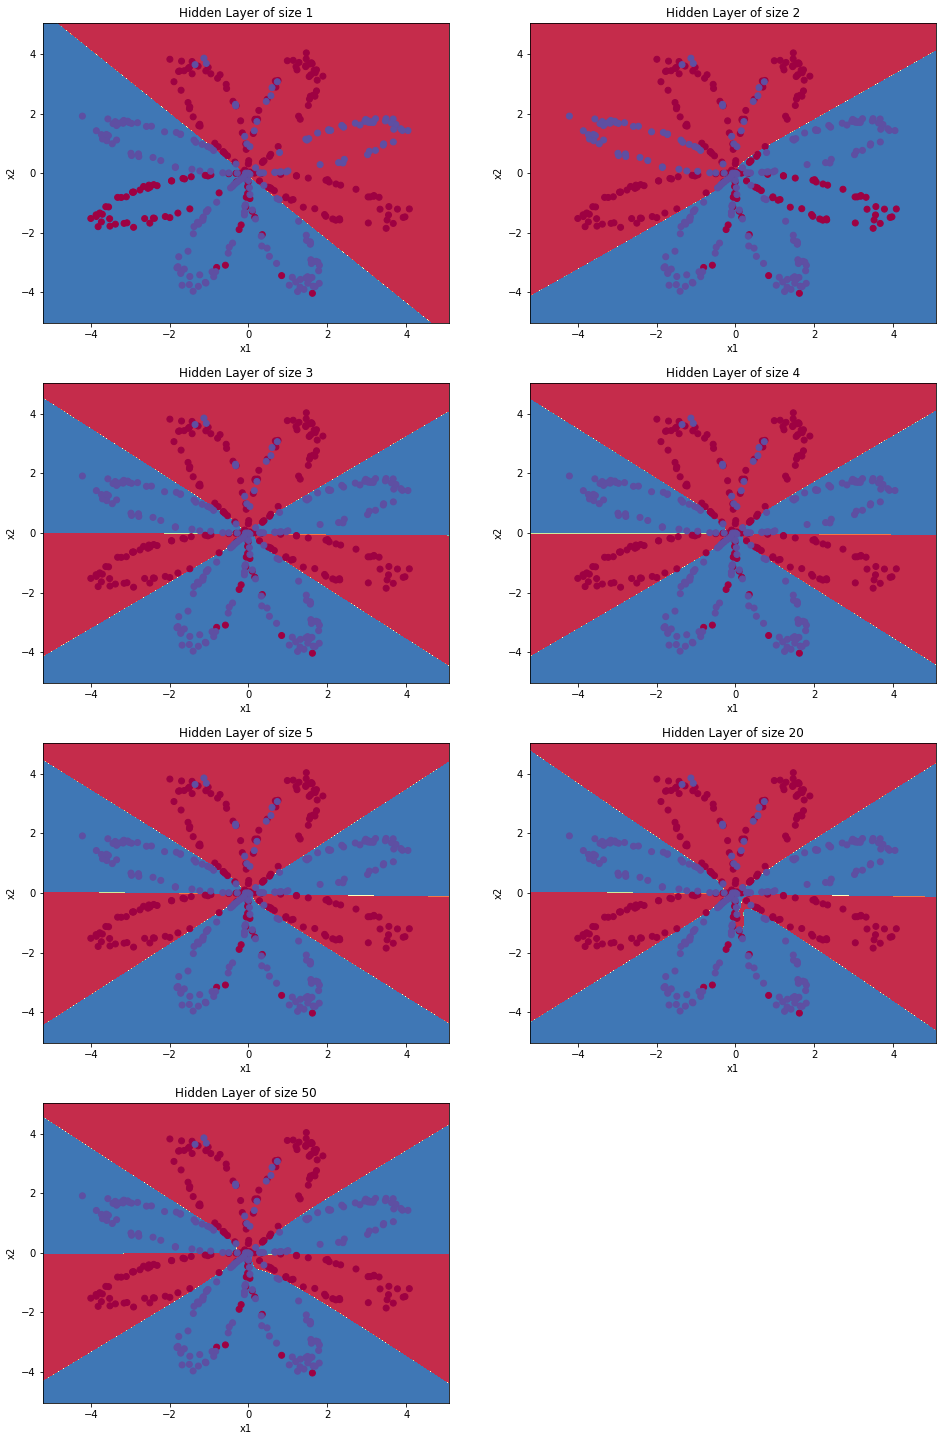

In [7]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
loss = BinaryCrossEntropyLoss()
n_epoch = 1000

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)

    m = Sequentiel(Linear(2, n_h), TanH(), Linear(n_h, 1))
    op = SGD(m, loss, lr=.1)
    for _ in range(n_epoch):
        for batch in op.iterate_mini_batch(X, Y):
            batch_x, batch_y = batch
            op.step(batch_x, batch_y)
            op.zero_grad()

    m.add_layer(Sigmoid())
    plot_decision_boundary(lambda x: (m.forward(x) >= 0.5), X, Y)
    
    yhat = m.forward(X) >= 0.5
    print(f"Accuracy for {n_h} hidden units: {accuracy_score(Y, yhat)}")

Accuracy for 1 hidden units: 0.6825
Accuracy for 2 hidden units: 0.6775
Accuracy for 3 hidden units: 0.67
Accuracy for 4 hidden units: 0.9125
Accuracy for 5 hidden units: 0.9225
Accuracy for 20 hidden units: 0.9275
Accuracy for 50 hidden units: 0.9275


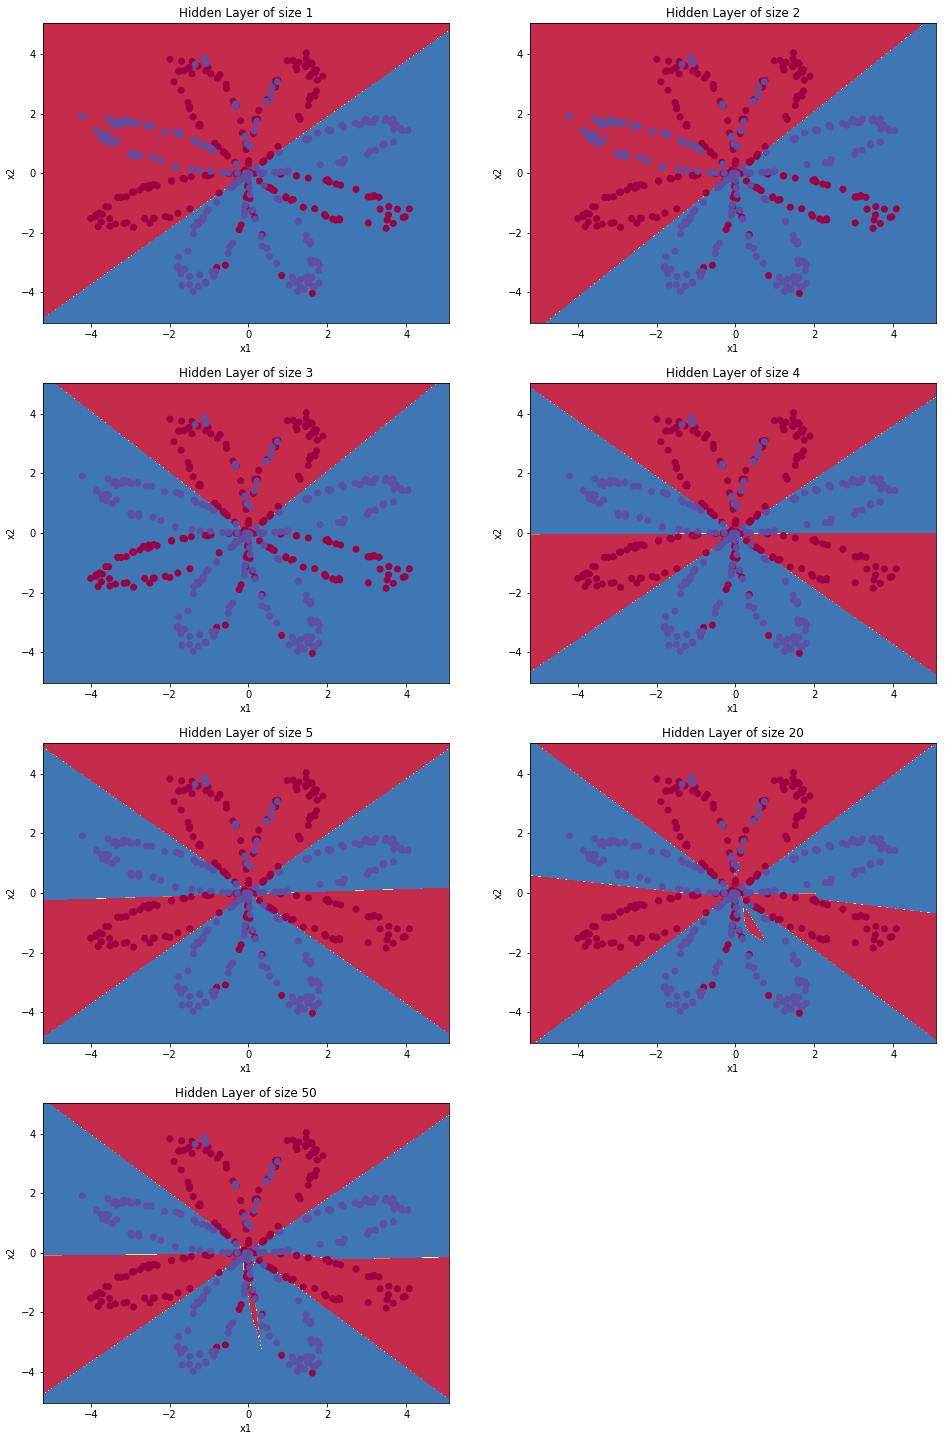

In [8]:
plt.figure(figsize=(16, 32))
n_epoch = 1000
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)

    m = Sequentiel(Linear(2, n_h), TanH(), Linear(n_h, 1))
    op = Adam(m, loss, lr=.1)
    for epoch in range(n_epoch):
        for batch in op.iterate_mini_batch(X, Y):
            batch_x, batch_y = batch
            op.step(batch_x, batch_y, epoch+1)
            op.zero_grad()

    m.add_layer(Sigmoid())
    plot_decision_boundary(lambda x: (m.forward(x) >= 0.5), X, Y)

    yhat = m.forward(X) >= 0.5
    print(f"Accuracy for {n_h} hidden units: {accuracy_score(Y, yhat)}")

## Multi classe

In [2]:
X, Y = load_usps("../data/USPS_train.txt")

Y_onehot = one_hot(Y)

print(X.shape, Y.shape)

(7291, 256) (7291,)


In [3]:
x_train, x_val, y_train, y_val = train_test_split(X, Y_onehot, test_size=.2)

In [4]:
m = Sequentiel(Linear(256, 128), ReLU(), Linear(128, 64), ReLU(), Linear(64, 32), ReLU(), Linear(32, 10))
loss = CrossEntropy()

epochs = 100

op = SGD(m, loss, lr=.1)

trainer = Trainer(op, loss, 100, x_train, y_train, x_val, y_val)
train_loss, val_loss = trainer.run()

Epoch 0...
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(

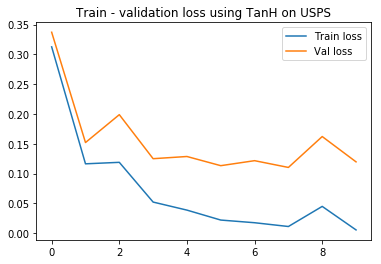

In [5]:
plt.plot(range(len(train_loss)), train_loss, label="Train loss")
plt.plot(range(len(val_loss)), val_loss, label="Val loss")
plt.title("Train - validation loss using TanH on USPS")
plt.legend()

In [6]:
X_test, Y_test = load_usps("../data/USPS_test.txt")

In [7]:
m.add_layer(SoftMax())

yhat = np.argmax(m.forward(X_test), axis=1)

accuracy_score(Y_test, yhat)

0.9382162431489786

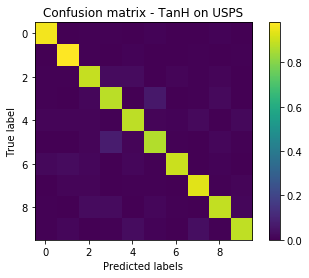

In [14]:
cm = confusion_matrix(Y_test, yhat)

fig = plt.figure()

plt.title("Confusion matrix - TanH on USPS")
plt.xlabel("Predicted labels")
plt.ylabel("True label")

im = plt.imshow(cm)

fig.colorbar(im)


In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")

In [5]:
X, Y = mnist["data"].to_numpy(), mnist["target"].to_numpy()

# with open("../data/MNIST_data.npy", "wb") as f:
#     np.save(f, X)

# with open("../data/MNIST_label.npy", "wb") as f:
#     np.save(f, Y)

X = X / 255
Y = Y.astype("int")

In [8]:
X.shape

(70000, 784)

In [13]:
with open("../../archives/auto_encoder/model", "rb") as f:
    m = pickle.load(f)

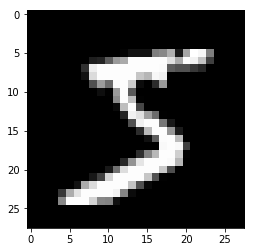

In [14]:
plt.imshow(X[0, :].reshape(28, 28), cmap=plt.get_cmap("gray"))

In [15]:
X_decoded = m.forward(X)

In [16]:
X_decoded.shape

(70000, 784)

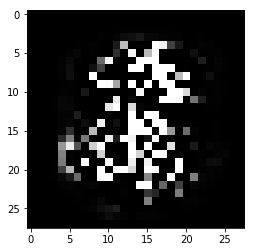

In [17]:
plt.imshow(X_decoded[0, :].reshape(28, 28), cmap=plt.get_cmap("gray"))